Programa de Pós-graduação em Ciências da Computação (PPCIC)

Centro Federal de Educação Tecnológica Celso Suckow da Fonseca – (CEFET/RJ)

Disciplina: Aprendizado de Máquina

Prof.: Eduardo Bezerra

Aluna: Érica Carneiro

Para a correta execução das funções de predição em aprendizado de máquina, o uso de algumas bibliotecas em Python são de grande para o auxílio e execução dos algoritmo presentes neste trabalhos.
Ressalta-se que optou-se por executar todas as funções dentro do presente documento de modo a facilitar a visualilzação, aprendizado e possíveis inferências que as mesmas poderiam trazer ao leitor e autor do presente documento. 

##Importação de bibliotecas das principais bibliotecas

As bibliotecas relacionadas abaixo foram utilizadas no presente documento. Todas são de fundamental importância para a execução das funções e execução dos algoritmos de aprendizado de máquina para o desenvolvimento deste trabalho.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

##Importação de Arquivos

A fim de facilitar o desenvolvimento e agilizar as etapas de importação de arquivos, optou-se pela importação automática de arquivos salvos no drive pessoal do Google. Como o Google Colab exige que arquivos e algoritmos sejam reprocessados ou importados novamete, a aplicação abaixo evita o constante upload individual de data frames.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
dir = '/content/drive/My Drive/AM-T1-dados'
os.chdir(dir)

#1. Aprendizado Supervisionado Revisitado

##1.1 Aprendizado de Regressores

###1.1.1 Regressão com uma Variável

Assim como no primeiro trabalho, demonstrar-se-á um passo a passo de modo a implementar a regressão linear com uma variável, também denominada regressão linear simples. As análises que se utilizam deste tipo de equação possuem apenas duas variáveis, uma dependente e outra independente. Sua fórmula pode ser representada pela função da equação linear:

y= a + bx

É importante destacar que a relação entre as variáveis possibilitará a predição ou estimativa de outras variáveis.

A aplicação abaixo tem como objetivo predizer o lucro para uma cadeia de food truck. Valores negativos correspondem a filiais cujo retorno de investimento não corresponde ao esperado.



Utilizar-se-á para este trabalho o link com o dataset a fim de facilitar a importação de dados. A seguir, o dataset é carregado e sua análise inicial é realizada e os dados são conertidos em array por meio da biblioteca numpy (numpy array) através do comando np.array.

In [5]:
data1 = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data1.txt'
d1 = pd.read_table(data1,
                      sep=',',
                      header=None,
                      names=['População', 'Lucro'])

X = np.array(d1.População)
X = X.reshape(-1, 1)
y = np.array(d1.Lucro)

d1.head()

,População,Lucro
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
arquivo = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data1.txt'
dados = pd.read_table(arquivo,
                      sep=',',
                      header=None,
                      names=['População', 'Lucro'])

X = np.array(dados.População)
X = X.reshape(-1, 1)
y = np.array(dados.Lucro)

dados.head()

,População,Lucro
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


O resumo estatísticos de dados numéricos pode ser verificado pelo comando a seguir:

In [7]:
d1.describe()

,População,Lucro
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


###Gráfico de dispersão

A seguir, gera-se o gráfico de dispersão. Por ele, é possível inferir que quanto maior a população, maior será o lucro da filial.

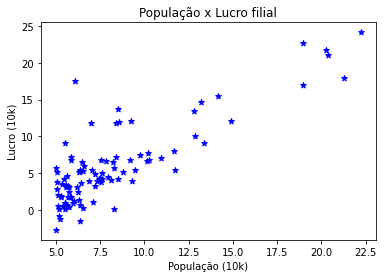

In [8]:
plt.scatter(X, y, color='blue', marker='*')
plt.title('População x Lucro filial')
plt.xlabel('População (10k)')
plt.ylabel('Lucro (10k)')
plt.show()

Regressão com uma Variável com o algoritmo k-NN, classe KNeighborsRegressor

O alvo é previsto por interpolação local dos alvos associados aos vizinhos mais próximos no conjunto de treinamento. Assim, o *label* atribuído a um ponto de consulta é calculado com base na média de seus pontos vizinhos mais próximos.

Importação das bibliotecas para o cálculo de regressão com uso do algoritmo k-NN.

*import train_test_split* é utilizada no momento da atribuição dos valores de teste.

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split


Inicialmente, os valores para treino e teste são atribuídos. O argumento iloc é um seletor de linhas e/ou colunas. Aqui ele será utilizado para selecionar até a última linha do quadro de dados. 

In [10]:
X = np.array(d1.iloc[:, :-1])
y = np.array(d1.iloc[:, 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)


Aplica-se a função def kneighbors() da biblioteca Scikit Learn Retorna índices e distâncias dos vizinhos de cada ponto. É importante ressaltar que caso o algoritmo k-NN verificar que dois vizinhos têm a mesma distâncias, mas rótulos diferentes, os resultados dependerão da ordem dos dados de treinamento.

In [11]:
neigh = KNeighborsRegressor(n_neighbors=2)

A função abaixo ajusta o regressor de *k-neighbors* mais próximos do conjunto de dados de treinamento.

In [12]:
neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

Já a função *.predict* prevê a meta para os dados fornecidos.

In [13]:
print(neigh.predict([[1.5]]))

[1.51035]


Por meio dos comandos abaixo, é possível verificar a precisão do modelo por meio da função .*score*, bem como o valor de conclusão do melhor modelo.

In [14]:
params = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsRegressor(weights = 'distance')

search = RandomizedSearchCV(knn, params, n_iter=20, cv=5, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

k = search.best_params_['n_neighbors']
best_score = np.sqrt(-search.best_score_)

print(f'Melhor Modelo - RMSE: {best_score}')
print(f'com k = {k}')

model = search.best_estimator_
y_pred = model.predict(X_test)
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

Melhor Modelo - RMSE: 2.8034808460647644
com k = 6
Score do modelo: 4.5732359504434195


### Regressão com uma Variável Algoritmo de indução com árvores de decisão, classe DecisionTreeRegressor

Árvores de decisão, ou *Decision Trees (DTs)* é um método de aprendizado supervisionado sem parâmetros usado para classificação e regressão. O objetivo de tal metodologia é criar um modelo que preveja o valor de uma variável de destino, aprendendo regras de decisão simples inferidas dos recursos de dados. Uma árvore pode ser vista como uma aproximação constante por partes.

Assim, as árvores de decisão aprendem com os dados a se aproximar de uma curva senoidal com um conjunto de regras de decisão *if-then-else*. Quanto mais profunda a árvore, mais complexas são as regras de decisão e mais adequado é o modelo.

In [15]:
params = {'max_depth': [None] + list(range(2, 31)),'criterion': ['mse', 'friedman_mse', 'mae']}
dt = DecisionTreeRegressor()

search = RandomizedSearchCV(dt, params, n_iter=20, cv=5, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

max_depth = search.best_params_['max_depth']
criterion = search.best_params_['criterion']
best_score = np.sqrt(-search.best_score_)

print(f'Melhor Modelo - RMSE: {best_score}')
print(f'Altura da árvore: {max_depth}')
print(f'Critério de qualidade da divisão: {criterion}')

model = search.best_estimator_
y_pred = model.predict(X_test)
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

Melhor Modelo - RMSE: 2.687099639685001
Altura da árvore: 2
Critério de qualidade da divisão: friedman_mse
Score do modelo: 3.982467715922925


###1.1.2 Regressão com múltiplas variáveis


Carregamento e visualização dos dados:

In [16]:
arquivo2 = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex1data2.txt'
dados2 = pd.read_table(arquivo2,
                      sep=',',
                      header=None,
                      names=['Tamanho', 'Cômodos', 'Preço'])

dados2.head()

,Tamanho,Cômodos,Preço
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [17]:
X2 = np.array(dados2.iloc[:, :-1])
y2 = np.array(dados2.iloc[:, 1])
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=31)

A seguir, realizar-se-á a normalização por *StandardScaler*. Trata-se de uma técnica comum em aprendizado de máquina cujo objetivo é alterar os valores das colunas numéricas no conjunto de dados. Além disso, é necessária para que alguns algoritmos de modelagem de dados funcionem corretamente. Desta forma, uma escala comum é aplicada, mas sem modificar as diferenças nos intervalos de valores ou perder informações. 

O *estimator* reajustado é disponibilizado no atributo best_estimator_ e permite o uso de previsão diretamente na instância randomGrd_search.

Já os parâmentros de teste são definidos em "*params = *"

### Regressão com Múltiplas Variáveis - Algoritmo k-NN

In [18]:
ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)

params = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsRegressor(weights = 'distance')

search = RandomizedSearchCV(knn, params, n_iter=20, cv=10, scoring='neg_mean_squared_error')
search.fit(X_train_norm, y_train)

k = search.best_params_['n_neighbors']
best_score = np.sqrt(-search.best_score_)

print(f'Melhor Modelo - RMSE: {best_score}')
print(f'Com k = {k}')

model = search.best_estimator_
X_test_norm = ss.fit_transform(X_test)
y_pred = model.predict(X_test)
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

Melhor Modelo - RMSE: 3.0355765854733057
Com k = 9
Score do modelo: 13.83450381364281


### Regressão com Múltiplas Variáveis - Algoritmo de indução de árevore de decisão

In [19]:

params = {'max_depth': [None] + list(range(2, 31)),'criterion': ['mse', 'friedman_mse', 'mae']}
dt = DecisionTreeRegressor()

search = RandomizedSearchCV(dt, params, n_iter=20, cv=10, scoring='neg_mean_squared_error')
search.fit(X_train_norm, y_train)

max_depth = search.best_params_['max_depth']
criterion = search.best_params_['criterion']
best_score = np.sqrt(-search.best_score_)

print(f'Melhor Modelo - RMSE: {best_score}')
print(f'Altura da árvore: {max_depth}')
print(f'Critério de qualidade da divisão: {criterion}')

model = search.best_estimator_
y_pred = model.predict(X_test)
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

Melhor Modelo - RMSE: 2.860275716669729
Altura da árvore: 2
Critério de qualidade da divisão: mse
Score do modelo: 16.684082479025133


##1.2 Aprendizado de Classificadores

Reimporta-se as bibliotecas acima a fim de otimizar o tempo no Googles Colab.
Novas bibliotecas foram acrescentadas a fim de possibilitar a execução das tarefas de ajustes e avaliação dos modelos:



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import metrics

Carregamento dos dados:

In [21]:
arquivo3 = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex2data1.txt'
dados3 = pd.read_table(arquivo3,
                      sep=',',
                      header=None,
                      names=['Prova 1', 'Prova 2', 'Aprovado'])
dados3.head()

,Prova 1,Prova 2,Aprovado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [22]:
X3 = np.array(dados3.iloc[:, :-1])
y3 = np.array(dados3.iloc[:, -1])
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=31)

1.2.1 Visualização dos dados:

Optou-se por importar novamente os dados e apresentar a tabela a fim de evitar problemas na visualização do gráfico de dispersao. A função abaixo permite o carregamento dos dados.

In [23]:
def importarDados(filepath, names):
    path = os.getcwd() + filepath  
    data = pd.read_csv(path, header=None, names=names)

    X = data.iloc[:, 0:-1].values
    y = data.iloc[:, -1:].values

    return X, y

Visualiação dos dados

In [24]:
f3 = pd.read_csv("ex2data1.txt", names = ["Avaliação 1", "Avaliação 2", "Classificação"])
f3.head()

,Avaliação 1,Avaliação 2,Classificação
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [25]:
X3, y3 = importarDados(filepath="/ex2data1.txt", names = ["Avaliação 1", "Avaliação 2", "Classificação"])

A seguir, aplica-se o comando para visualização do gráfico de dispersão a fim de exibir os dados em gráfico.

In [26]:
def plot3(data, filename = 'target/plot3.1.png'):
   
    positivo = data[data['Classificação'].isin([1])]
    negativo = data[data['Classificação'].isin([0])]

    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(positivo['Avaliação 1'], positivo['Avaliação 2'], s=50, c='k', marker='+', label='Classificado')
    ax.scatter(negativo['Avaliação 1'], negativo['Avaliação 2'], s=50, c='y', marker='o', label='Não Classificado')
    ax.legend()
    ax.set_xlabel('Nota da Avaliação 1')
    ax.set_ylabel('Nota da Avaliação 2')

    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))

    plt.savefig(filename)
    plt.show()

É possível inferir pela imagem abaixo que apenas uma nota muito alta em apenas uma das valiações não garante a aprovação do aluno. Sendo assim, é possível sugerir que as notas são dadas por média aritmética com peso 1 para cada uma das avaliações.

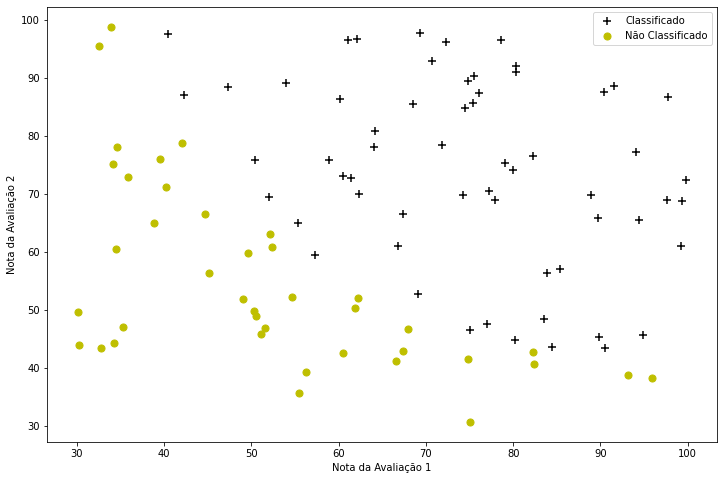

In [27]:
plot3(f3)

###1.2.2 Ajuste dos modelos

A criação de modelos de classificação com base nos algoritmos Naive Bayes, Regressão Logística, k-NN e Decision Tree.

Como já informado, primeiramente, é necessário carregar as bibliotecas do sklearn utilizadas para classificações baseadas nos algoritmos supracitados:

###1.2.2 Ajuste dos modelos - Naïve Bayes, classe GaussianNB;
###1.3.3 Avaliação dos modelos


Inicialmente, ajusta-se o modelo Gaussian. Para tanto, a função Gaussian Naïve Bayes (GaussianNB) foi aplicada ao modelo Naïve Bayes sem sintonização de hiperparâmetros

O método Naive Bayes é um conjunto de algoritmos de aprendizagem supervisionada com base na aplicação do teorema de Bayes. Possui suposição "ingênua" de independência condicional entre cada par de recursos dado o valor da variável de classe.

O ajuste de modelos por Gaussian Naive Bayes (GaussianNB), é capaz de executar atualizações online para os parâmetros do modelo por meio de partial_fit.

Alguns testes foram executados a fim de visializar a execução de alguns dos métodos utilizados pela scikit learn para o ajuste de modelos:

fit(X, y[, sample_weight]) - Ajusta a Gaussian Naive Bayes de acordo com X, y

In [28]:
from sklearn.model_selection import train_test_split

In [29]:

filepath = 'https://raw.githubusercontent.com/MLRG-CEFET-RJ/ml-class/master/ml-t1/data/ex2data1.txt'

df1 = pd.read_csv(filepath, header=None, names=['Prova 1', 'Prova 2', 'Aprovado'])

In [30]:
df1.describe()

,Prova 1,Prova 2,Aprovado
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


A seguir, far-se-á alguns comentários no código a fim de facilitar a visualizaçãoo das informações.

In [31]:
from sklearn.tree import DecisionTreeClassifier #DTree
from sklearn.naive_bayes import GaussianNB #NBayes
from sklearn.linear_model import LogisticRegression #Regressão Logística
from sklearn.neighbors import KNeighborsClassifier #KNN Classificação
from sklearn.preprocessing import PolynomialFeatures #Polynomial
from sklearn.metrics import classification_report #Matriz de Confusão
from sklearn import metrics #Gerar a classificação dos modelos
import seaborn as sns #Plotar Gráficos
import matplotlib.pyplot as plt #Plotar Gráficos

#divide features(X) do target (y)
X_df = np.array(df1.iloc[:, :-1])
y_df = np.array(df1.iloc[:, -1])
#divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=27) #separa 20% para teste

Mostrando os cinco primeiros valores do X de treino

In [32]:

X_train[:5,:]

array([[94.09433113, 77.15910509],
       [97.77159928, 86.72782233],
       [70.66150955, 92.92713789],
       [74.49269242, 84.84513685],
       [75.47770201, 90.424539  ]])

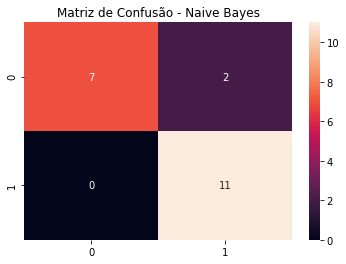

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.85      1.00      0.92        11

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



In [33]:
#ajuste de modelo
model_bayes = GaussianNB()
model_bayes.fit(X_train,y_train)
#predição
y_pred_bayes = model_bayes.predict(X_test)
#matriz confusão
cm_nb = metrics.confusion_matrix(y_test,y_pred_bayes)
sns.heatmap(cm_nb, annot=True)
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()
#métricas de desempenho padrão
print(classification_report(y_test, y_pred_bayes))

###Ajuste e avaliação dos modelos - Regressão Logística

Importante observar que em casos com múltiplas classes, o algoritmo de treinamento usa o esquema *one-vs-rest (OvR)* quando a opção *ovr* está configurada. Caso a configuração seja *multinomial*, o algoritmo utilizará a perda de entropia cruzada. 





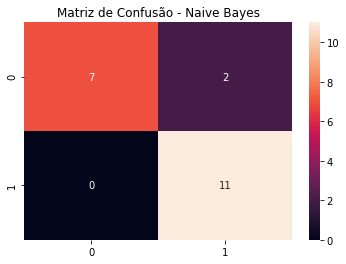

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.85      1.00      0.92        11

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



In [34]:
#ajuste de modelo
model_reglog = LogisticRegression()
model_reglog.fit(X_train,y_train)
#predição
y_pred_reglog = model_reglog.predict(X_test)
#matriz confusão
cm_reglog = metrics.confusion_matrix(y_test,y_pred_reglog)
sns.heatmap(cm_reglog, annot=True)
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()
#métricas de desempenho padrão
print(classification_report(y_test, y_pred_reglog))

###Ajuste e avaliação dos modelos - kNN

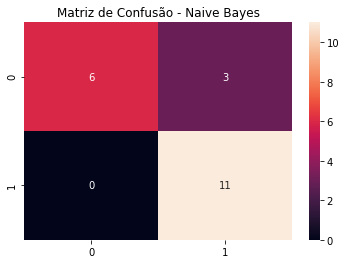

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.79      1.00      0.88        11

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20



In [35]:
#ajuste de modelo
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
#predição
y_pred_knn = model_knn.predict(X_test)
#matriz confusão
cm_knn = metrics.confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cm_knn, annot=True)
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()
#métricas de desempenho padrão
print(classification_report(y_test, y_pred_knn))

### Ajuste e avaliação dos modelos - Árvore de decisão

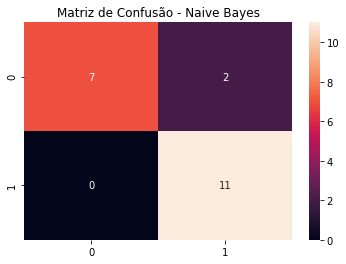

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.85      1.00      0.92        11

    accuracy                           0.90        20
   macro avg       0.92      0.89      0.90        20
weighted avg       0.92      0.90      0.90        20



In [36]:
#ajuste de modelo
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
#predição
y_pred_dt = model_dt.predict(X_test)
#matriz confusão
cm_dt = metrics.confusion_matrix(y_test,y_pred_dt)
sns.heatmap(cm_dt, annot=True)
plt.title('Matriz de Confusão - Naive Bayes')
plt.show()
#métricas de desempenho padrão
print(classification_report(y_test, y_pred_dt))

###1.2.4 Mapeamento de Caracteristicas

Incialmente, importa-se a função *PolynomialFeatures da SkLearn. Com ela, é possível gerar uma nova matriz de *features* composta de todas as combinações polinomiais dos *features* com grau menor ou igual ao grau especificado. Assim, no caso de um amostra de entrada bidimensional de forma [a, b], trazendo novos *features* recursos polinomiais de grau 2, representados por [1, a, b, a ^ 2, ab, b ^ 2].

É importante ressaltar que a matriz de saída escala polinomialmente no número de *features* da matriz de entrada e exponencialmente seu grau. Desta forma, essa elevação de graus pode causar ***overfitting***.

In [37]:
from sklearn.preprocessing import PolynomialFeatures

Aplicação da função *PolynomialFeatures* seguida da .fit,  que irá calcular o número de recursos de saída.

In [38]:
poly = PolynomialFeatures(degree = 6, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)
X_poly.shape
X_poly_test = poly.fit_transform(X_test)

Treino do modelo no conjunto de treinamento utilizando a função *LogisticRegression*:

In [39]:

reglog = LogisticRegression() 
reglog.fit(X_poly, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*.predict* irá realizar as previsões no conjunto de teste. 
Já *accuracy_score* compara os valores de resposta reais em y_test com os valores de resposta previstos  em y_pred.

In [40]:

y_pred = reglog.predict(X_poly_test) 

 
from sklearn import metrics 
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Logistic Regression model accuracy(in %): 100.0


É possível inferir pelo resultado queo modelo sofre de *overfitting, ou seja, ainda que se ajuste bem ao conjunto de dados, é ineficaz ao fazer previsões.

Matriz de confusão da Regressão logistica
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



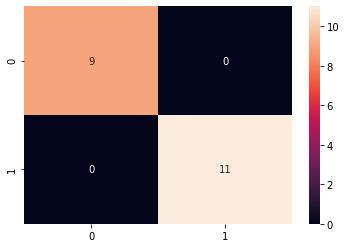

In [41]:
print("Matriz de confusão da Regressão logistica")
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

###1.2.5 Esboço da fronteira de decisão

Abaixo, apresentam-se os comandos para o *plot* do gráfico da fronteira de decisão. Comentários foram inseridos no código a fim de facilitar a leitura.

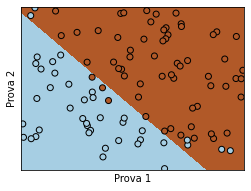

In [42]:
reglog = LogisticRegression() 
reglog.fit(X_train, y_train)

#Traça o limite de decisão por meio da atribuição de diferentes cores para cada 
#ponto na malha [x_min, x_max] x [y_min, y_max].
x_min, x_max = X_df[:, 0].min() - .5, X_df[:, 0].max() + .5
y_min, y_max = X_df[:, 1].min() - .5, X_df[:, 1].max() + .5
h = .02  # Tamanho do passo na malha
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = reglog.predict(np.c_[xx.ravel(), yy.ravel()])

# Colocar resultado em gráfico de cores
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Acrescentar os pontos de treinamento à imagem
plt.scatter(X_df[:, 0], X_df[:, 1], c=y_df, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Prova 1')
plt.ylabel('Prova 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

A seguir, outro exeplo de plot de gráfico de dispersão. Por alguma razão os dados se deslocaram para o alto e à direita, porém a curva está no local correto. 

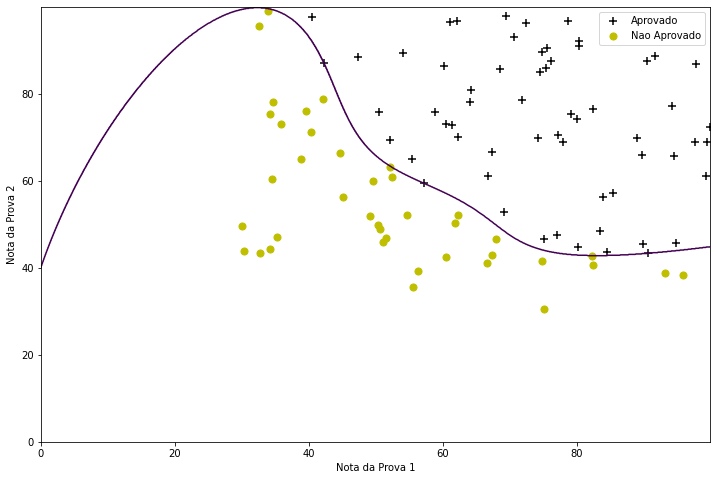

In [43]:
poly = PolynomialFeatures(6)
X_train_poly = poly.fit_transform(X_train)
model_reglog_poly = LogisticRegression()
model_reglog_poly.fit(X_train_poly, y_train)

xx, yy = np.mgrid[0:100:.1, 0:100:.1]
grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.fit_transform(grid)
probs = model_reglog_poly.predict_proba(grid_poly)[:, 1].reshape(xx.shape)

pos = X_df[y_df == 1]
neg = X_df[y_df == 0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos[:, :-1], pos[:, -1:], s=50, c='k', marker='+', label='Aprovado')
ax.scatter(neg[:, :-1], neg[:, -1:], s=50, c='y', marker='o', label='Nao Aprovado')
ax.contour(xx, yy, probs, levels=[0.5])
ax.legend()
ax.set_xlabel('Nota da Prova 1')
ax.set_ylabel('Nota da Prova 2')
plt.show()

##1.3 Regularização

###1.3.1Visualização de dados

Importando bibliotecas.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import scipy.io as spi
import scipy.optimize as opt
import scipy.io
import scipy.io as sio
import scipy.optimize as opt
import requests

Importando dados:

In [45]:
filepath = 'https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml-t1/data/ex5data1.mat?raw=true'
r = requests.get(filepath, allow_redirects=True)
open('ex5data1.mat', 'wb').write(r.content)

data = scipy.io.loadmat('ex5data1.mat')

X = data["X"]
y = data["y"]
Xval = data["Xval"]
yval = data["yval"]
Xtest = data["Xtest"]
ytest = data["ytest"]

Visualização dos dados em gráfico com os pontos de dados do conjunto de treinamento.

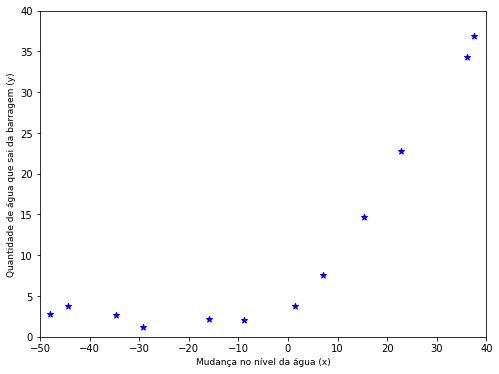

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,6))
plt.scatter(X, y, s=40, marker='*', color='blue')
plt.xlabel('Mudança no nível da água (x)', fontsize=9)
plt.ylabel('Quantidade de água que sai da barragem (y)', fontsize=9)
plt.axis((-50, 40, 0, 40));


###1.3.2 Ajuste de um regressor linear

A função *LinearRegression* será utilizada para treinar o modelo no conjunto de treinamento, juntamento com *.fit*. A seguir *.predict* fará as previsões no conjunto de teste.

In [47]:

from sklearn.linear_model import LinearRegression
reglin = LinearRegression() 
reglin.fit(X, y)

ypred = reglin.predict(Xtest) 

Importa-sa a função de erro quadrático médio a fim de comparar os valores de resposta reais (y_test) com os valores de resposta previstos (y_pred) 

In [48]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error



print('MSE: %.2f' % mean_squared_error(ytest, ypred))  
print('RMSE: %.2f' % np.sqrt(mean_squared_error(ytest, ypred)))
print('MAE: %.2f' % mean_absolute_error(ytest, ypred))

MSE: 65.01
RMSE: 8.06
MAE: 5.82


Importando bibliotecas para visualização de gráficos. 

In [49]:
import matplotlib
import matplotlib.pyplot as plt

Comandos de plot e visualização do gráfico da regressão Linear

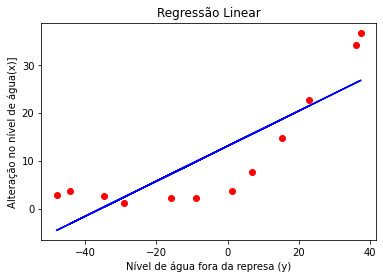

In [50]:
plt.scatter(X, y, color = 'red')
plt.plot(X, reglin.predict(X), color = 'blue')
plt.title('Regressão Linear')
plt.xlabel('Nível de água fora da represa (y)')
plt.ylabel('Alteração no nível de água(x)]')
plt.show()

###1.3.3 Curva de aprendizado

In [51]:
train_sizes = [1,2, 3,4,5, 6,7,8, 9]

Importação de biblioteca 

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),
                                                                X = X,y = y, train_sizes = train_sizes, cv = 5,
                                                                scoring = 'neg_mean_squared_error')

In [53]:
print('Pontuação de treinamento:\n\n', train_scores)
print('\n', '-' * 70) # separador para facilitar a leitura na saída 
print('\nPontuação de validação:\n\n', validation_scores)

Pontuação de treinamento:

 [[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [-3.71750702e-29 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [-5.85185260e+01 -6.57319009e+00 -6.57319009e+00 -6.57319009e+00
  -6.57319009e+00]
 [-5.51651851e+01 -1.49845764e+01 -5.68535538e+00 -5.68535538e+00
  -5.68535538e+00]
 [-4.43001645e+01 -1.86631327e+01 -2.63080976e+01 -2.63080976e+01
  -2.63080976e+01]
 [-5.49190051e+01 -3.02729626e+01 -3.88879250e+01 -3.88879250e+01
  -3.88879250e+01]
 [-5.14416313e+01 -3.64255523e+01 -5.17606029e+01 -4.01970433e+01
  -4.01970433e+01]
 [-5.13745879e+01 -3.74476491e+01 -5.40693573e+01 -3.63457174e+01
  -3.63457174e+01]
 [-4.70009285e+01 -3.45442352e+01 -5.69210693e+01 -4.19159257e+01
  -4.52188108e+01]]

 ----------------------------------------------------------------------

Pontuação de validação:

 [[-827.48611597 -401.59942884  -79.19249676   -2.56520775 -227.64182874]
 [ -89.53930838 -319.70334348  -5

In [54]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Pontuação média de treinamento\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separador para facilitar a leitura na saída
print('\nPontuação média de validação\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Pontuação média de treinamento

 1   -0.000000e+00
2    7.435014e-30
3    1.696226e+01
4    1.744117e+01
5    2.837752e+01
6    4.037115e+01
7    4.400437e+01
8    4.311661e+01
9    4.512019e+01
dtype: float64

 --------------------

Pontuação média de validação

 1    307.697016
2    127.322645
3     77.368267
4     84.018408
5     71.649292
6     66.252194
7     59.665961
8     61.935812
9     53.480091
dtype: float64


Visualização do gráfico de curvas de aprendizagem

(0.0, 320.0)

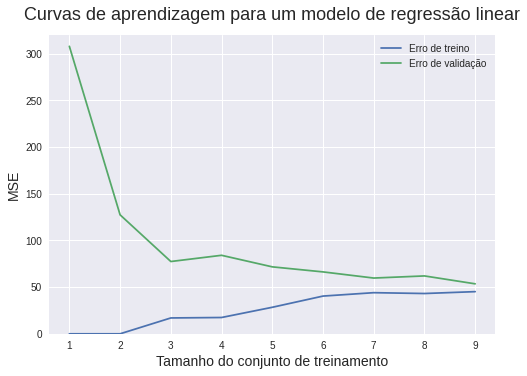

In [55]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Erro de treino')
plt.plot(train_sizes, validation_scores_mean, label = 'Erro de validação')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Tamanho do conjunto de treinamento', fontsize = 14)
plt.title('Curvas de aprendizagem para um modelo de regressão linear', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,320)

###1.3.4 Ajuste de um regressor polinomial não regularizado

Após a aplicação de *PolinomialFeatures* que irá escalonar as *features* e pontencializar os graus, aplica-se a função *StandardScaler*. Ela padroniza as *features* removendo a média e escalonando para a variação da unidade. Assim, a pontuação padrão de uma amostra x é calculada através de: z = (x - u) / s

Posteriormente, os dados são ajustados (*.fit*) e tranformados (*.transform*). 

In [56]:
poly = PolynomialFeatures(degree = 8, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape

scaler = StandardScaler()
scaler.fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)


Importando bilbiotecas d regressão linear.

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(estimator = LinearRegression(),
                                                                X = X_poly_scaled,y = y, train_sizes = train_sizes, cv = 5,
                                                                scoring = 'neg_mean_squared_error')

In [58]:
print('Pontuação de treinamento:\n\n', train_scores)
print('\n', '-' * 70) # eparador para facilitar a leitura na saída
print('\nPontuação de validação:\n\n', validation_scores)

Pontuação de treinamento:

 [[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [-1.66646866e-29 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [-3.28692044e-30 -4.22040584e-29 -4.22040584e-29 -4.22040584e-29
  -4.22040584e-29]
 [-1.99680417e-28 -1.42981039e-29 -1.11426603e-29 -1.11426603e-29
  -1.11426603e-29]
 [-5.97562136e-29 -4.22632230e-28 -4.52411729e-29 -4.52411729e-29
  -4.52411729e-29]
 [-8.35863867e-29 -3.16530438e-29 -1.86828558e-28 -1.86828558e-28
  -1.86828558e-28]
 [-2.98640200e-29 -2.50632379e-28 -7.93368682e-29 -4.80190902e-28
  -4.80190902e-28]
 [-1.19719503e-27 -6.76546834e-28 -3.90609408e-28 -5.60411717e-28
  -5.60411717e-28]
 [-2.12580484e-27 -2.10809929e-27 -4.95363014e-27 -1.30032764e-27
  -1.06384467e-27]]

 ----------------------------------------------------------------------

Pontuação de validação:

 [[-8.27486116e+02 -4.01599429e+02 -7.91924968e+01 -2.56520775e+00
  -2.27641829e+02]
 [-5.98727889e+02 -4.

In [59]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Pontuação média de treinamento\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # eparador para facilitar a leitura na saída
print('\nPontuação média de validação\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Pontuação média de treinamento

 1   -0.000000e+00
2    3.332937e-30
3    3.442063e-29
4    4.948130e-29
5    1.236224e-28
6    1.351450e-28
7    2.640430e-28
8    6.770349e-28
9    2.310341e-27
dtype: float64

 --------------------

Pontuação média de validação

 1    307.697016
2    264.500336
3      7.366670
4     13.890534
5     20.214010
6    266.113055
7     15.702785
8     14.525540
9     34.879952
dtype: float64


Comandos para visualização do gráfico de curvas de aprendizagem com regressão linear.

(0.0, 320.0)

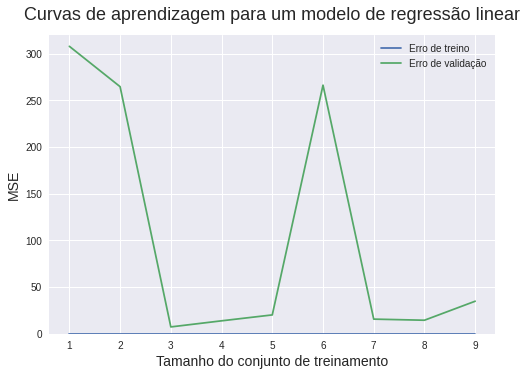

In [60]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Erro de treino')
plt.plot(train_sizes, validation_scores_mean, label = 'Erro de validação')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Tamanho do conjunto de treinamento', fontsize = 14)
plt.title('Curvas de aprendizagem para um modelo de regressão linear', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,320)

Curva de Regressão Polinomial

Aplicam-se as funções já utilizadas anteriormente

In [61]:
X = sorted(X)
y = sorted(y)
poly_reg=PolynomialFeatures(degree=8)
X_poly=poly_reg.fit_transform(X)
poly_reg.fit(X_poly,y)
linearRegressor2=LinearRegression()
linearRegressor2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
scaler = StandardScaler()
scaler.fit(X_poly)
X_poly_scaled = scaler.transform(X_poly)

Compandos para visualização do gráfico de regressão polinomial

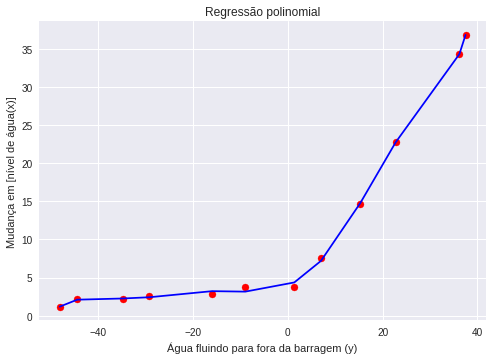

In [63]:

X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X,linearRegressor2.predict(X_poly),color='blue')
plt.title('Regressão polinomial')
plt.xlabel('Água fluindo para fora da barragem (y)')
plt.ylabel('Mudança em [nível de água(x)]')
plt.show()

###1.3.5 Ajuste de um regressor polinomial regularizado

In [64]:
train_sizes = np.arange(0.1,1,0.1)

In [65]:
X

[array([-48.05882945]),
 array([-44.38375985]),
 array([-34.70626581]),
 array([-29.15297922]),
 array([-15.93675813]),
 array([-8.94145794]),
 array([1.38915437]),
 array([7.01350208]),
 array([15.30779289]),
 array([22.76274892]),
 array([36.18954863]),
 array([37.49218733])]

In [66]:
type(X_test)

numpy.ndarray

Optou-se por refazer a declaração sem *sorted*, uma vez que os resutados de saída são os mesmos e o embaralhamento dos dados deu erro no final do processamento.
Testando novas declarações abaixo.

In [67]:
train_sizes = np.arange(0.1,1,0.1)

In [68]:
poly_reg=PolynomialFeatures(degree=8)
X_poly=poly_reg.fit_transform(np.array(X).reshape(-1,1))
X_test_poly=poly_reg.fit_transform(Xtest.reshape(-1,1))
X_val_poly=poly_reg.fit_transform(Xval.reshape(-1,1))
#poly_reg.fit(X_poly,y)

In [69]:
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_test_poly_scaled=poly_reg.fit_transform(X_test_poly)
X_val_poly_scaled=poly_reg.fit_transform(X_val_poly)

Ridge

Regularização de Tikhonov, também conhecida como regressão de Ridge, é um algoritmo de regressãousado para aproximar uma resposta para uma equação sem solução única. Esse tipo de problema é muito comum em tarefas de aprendizado de máquina, onde a "melhor" solução deve ser escolhida usando dados limitados.

Importando lianear model para regressao de Ridge

In [70]:
from sklearn import linear_model
reg_Ridge = linear_model.Ridge(alpha=1)
reg_Ridge.fit(X_poly_scaled,y)
reg_Ridge.coef_
reg_Ridge.intercept_


array([11.21758933])

Lasso

Trata-se da menor contração absoluta e operador de seleção. Assim como Ridge, é um método de análise de regressão que seleciona e regulariza variáveis ​​a fim de aprimorar a precisão da previsão e a interpretabilidade do modelo estatístico resultante.

Importando Linear model para execução de Lasso 

In [71]:
from sklearn import linear_model
reg_LarsLasso = linear_model.LassoLars(alpha=1)
reg_LarsLasso.fit(X_poly_scaled,y)
reg_LarsLasso.coef_
reg_LarsLasso.intercept_

array([11.21758933])

Abaixo, as funções Ridge e Lasso Range são utilizadas a fim de apresentar os valores dos parâmetros do teste

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from timeit import default_timer as timer
from sklearn.preprocessing import StandardScaler


#def Ridge_Rand(x, y, param, kfold, n):
#    param_grid = {'alpha':param}
#    #k = StratifiedKFold(n_splits=kfold)
#    randsearch = GridSearchCV(linear_model.Ridge(), param_grid=param_grid, cv=kfold, n_jobs=2,
#                                    verbose=1)
#    return randsearch.fit(x, y)

def Ridge_Rand(x, y, param, kfold, n):
    param_grid = {'alpha':param}    
    randsearch = GridSearchCV(linear_model.Ridge(), param_grid=param_grid, cv=kfold, n_jobs=2,verbose=1)
    return randsearch.fit(x, y)


def Lasso_Rand(x, y, param, kfold, n):
    param_grid = {'alpha':param}  
    randsearch = GridSearchCV( linear_model.LassoLars(), param_grid=param_grid, cv=kfold, n_jobs=2,verbose=1)

    return randsearch.fit(x, y)


start = timer()

alpha = [i for i in range(1,10)]


clf_Ridge = Ridge_Rand(x=X_poly, y=y, param=alpha, kfold=2, n=50)
#clf = Ridge_Rand(x=X_poly, y=y, param=alpha, kfold=2, n=50)

print('Ridge:')
print('Melhor precisão cv: {}' .format(clf_Ridge.best_score_))
print('Pontuação do conjunto de teste:   {}' .format(clf_Ridge.score(X_test_poly, ytest)))
print('Melhores parâmetros:  {}' .format(clf_Ridge.best_params_))
print()
Ridge_cbest_lf = clf_Ridge.best_estimator_

duration = timer() - start
print('tempo de execução de SearchCV: {}' .format(duration))
print('')
print('######################################')
print('')

start = timer()

alpha = [i for i in range(1,20)]


clf_LassoLars = Lasso_Rand(x=X_poly, y=y, param=alpha, kfold=2, n=50)

print('Lasso Lars:')
print('Melhor precisão cv: {}' .format(clf_LassoLars.best_score_))
print('Pontuação do conjunto de teste:   {}' .format(clf_LassoLars.score(X_test_poly, ytest)))
print('Melhores parâmetros:  {}' .format(clf_LassoLars.best_params_))
print()
LassoLars_best_clf = clf_LassoLars.best_estimator_

duration = timer() - start
print('tempo de execução de SearchCV: {}' .format(duration))

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Ridge:
Melhor precisão cv: -9465441555.101265
Pontuação do conjunto de teste:   0.8614907305604139
Melhores parâmetros:  {'alpha': 1}

tempo de execução de SearchCV: 1.120875902000023

######################################

Fitting 2 folds for each of 19 candidates, totalling 38 fits
Lasso Lars:
Melhor precisão cv: -20.102162508875946
Pontuação do conjunto de teste:   0.029968122297673427
Melhores parâmetros:  {'alpha': 3}

tempo de execução de SearchCV: 0.1336022370000478


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    1.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.17831e-27): result may not be accurate.
  overwrite_a=True).T
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  35 out of  38 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done  38 out of  38 | elapsed:    0.1s finished


In [73]:
train_sizes, train_scores, validation_scores = learning_curve(estimator = Ridge_cbest_lf,
                                                                X =X_poly_scaled,y = y, train_sizes = train_sizes,n_jobs=-1, cv = 5,
                                                                scoring = 'neg_mean_squared_error')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:1326: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 8 instead of 9).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)


In [74]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Pontuação média de treinamento\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nPontuação média de validação\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Pontuação média de treinamento

 1   -0.000000
2    0.007747
3    0.065194
4    0.066812
5    0.701514
6    3.018035
7    4.987994
8    4.153859
dtype: float64

 --------------------

Pontuação média de validação

 1    307.966262
2    262.418227
3    283.023442
4    277.495464
5    274.221750
6    264.362393
7    259.524446
8    219.434603
dtype: float64


Visualização do gráfico de curva de aprendizado polinomial reguçarizado. 
Supostamente, a reguarização deveria solucionar o problema de *overfitting*, porém, ainda que os números estejam corretos, as imagens ainda apresentam *overfitting*.

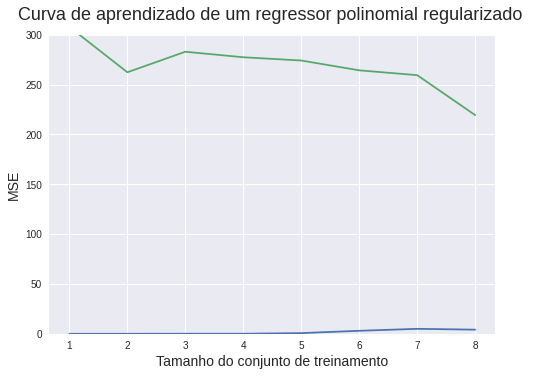

In [75]:

plt.plot(train_sizes, train_scores_mean, label = 'Erro de treinamentor')
plt.plot(train_sizes, validation_scores_mean, label = 'Erro de validação')
plt.title('Curva de aprendizado de um regressor polinomial regularizado ', fontsize = 18, y = 1.03)
plt.xlabel('Tamanho do conjunto de treinamento', fontsize = 14)
plt.ylabel('MSE', fontsize = 14)
plt.ylim(0,300)
plt.show()

###2 Redução de dimensionalidade

##2.1 Conjunto de dados de exemplo

Importação dos dados e plotagem

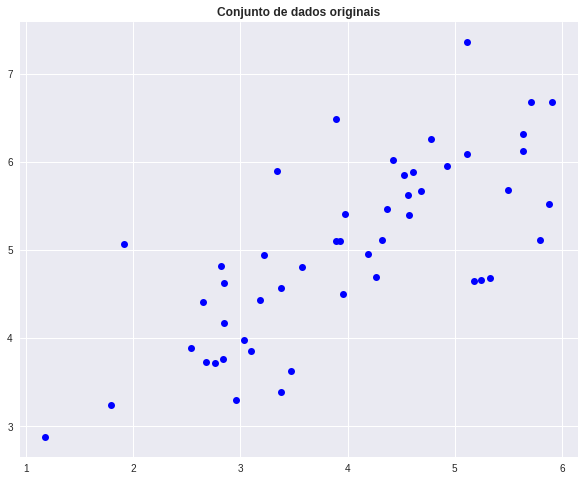

In [76]:
filepath = 'https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml-t2/data/ex7data1.mat?raw=true'
r = requests.get(filepath, allow_redirects=True)
open('ex7data1.mat', 'wb').write(r.content)

data = scipy.io.loadmat('ex7data1.mat')

X=data["X"]


plt.figure(figsize=(10,8))
plt.plot(X[:,0], X[:,1], 'bo')
plt.title('Conjunto de dados originais', fontweight='bold')
sns.despine()


##2.2 Implementando o PCA

Visualização das primeiras dez linhas do conjunto de dados

In [77]:

X[:10]

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929]])

importando bibliotecas necessárias:

In [78]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.io

Utiliza-se a função de normalização a fim de normalizar a caracteísticas, ou seja, colocando-as dentro de um intervalo.

In [79]:

def normalize_features(X):
	mu = np.mean(X,axis=0)
	sigma = np.std(X,axis=0)
	normalized_X = np.divide(X - mu,sigma)
	return (normalized_X, mu, sigma)
 

In [80]:
X_norm, mu, sigma = normalize_features(X)

Confere-se o resultado da normalização:

In [81]:

print(X_norm[:5], mu, sigma, sep='\n\n')

[[-0.52331306 -1.59279252]
 [ 0.46381518  0.84034523]
 [-1.14839331 -0.58315891]
 [-1.05405373 -1.27071783]
 [-0.98402167 -0.81658417]]

[3.98926528 5.00280585]

[1.16126017 1.01312201]


Implementação do PCA em uma função personalizada.
A Análise de Componentes Principais (PCA) é uma técnica estatística não-paramétrica e não supervisionada. Pode ser usada co o objetivo de deminuir a dimensionalidade no aprendizado de máquina, que pode representar alto número de *features* no conjunto de dados. 

In [82]:


def pca(X):
  
  
  #Define m como o número de exemplos de X
  m = X.shape[0]

  #Calcula a matriz de covariância
  X_mc = (1/m) * np.dot(X.T, X)

  #Decomposição da matriz de covariância (SVD)
  U, S, V = np.linalg.svd(X_mc)

  return (U, S)

In [83]:

U, S = pca(X_norm)
print('PCA de X:', U, sep='\n')

PCA de X:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Conferindo as dimensões da matriz:

In [84]:

print(X_norm.shape, U.shape)

(50, 2) (2, 2)


##2.3 Redução da Dimensionalidade

Após aplicação do PCA, os comandos abaixo apresenta o gráfico dos dados normalizados e reduzidos. 

(-2.6226554725605085,
 1.8588310209460752,
 -2.317921093885695,
 2.551139811950425)

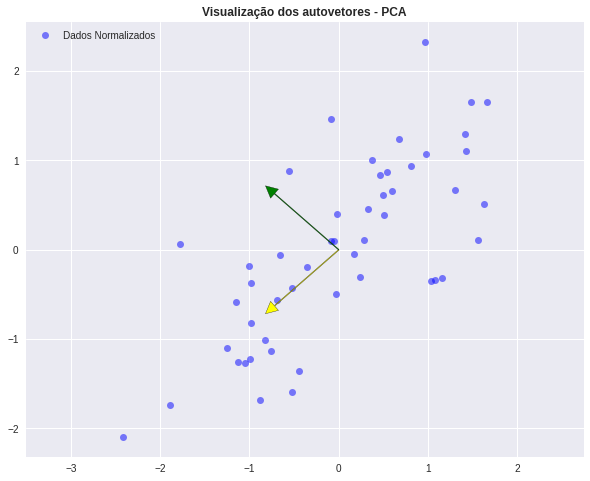

In [85]:

plt.figure(figsize=(10,8))

plt.axis('equal')
plt.plot(X_norm[:,0], X_norm[:,1], 'bo', alpha=0.5)

K = 2
for axis, color in zip(U[:K], ['yellow','green']):
  start, end = np.zeros(2), (mu + sigma * axis)[:K] - (mu)[:K]
  plt.annotate('', xy=end,xytext=start,
               arrowprops=dict(facecolor=color, width=0.8))
plt.title('Visualização dos autovetores - PCA', fontweight='bold')
plt.legend(['Dados Normalizados'], loc=2)

plt.axis('equal')


###2.3.1 Projetando os dados nos componentes principais

Utiliza-se a função abaixo: 

In [86]:
def project_data(X, U, K):
	U_reduce = U[:, 0:K]
	Z = np.zeros((len(X), K))
	for i in range(len(X)):
		x = X[i,:]
		projection_k = np.dot(x, U_reduce)
		Z[i] = projection_k
	return Z

A fim de realizar a projeção por meio dos comandos abaixo:

In [87]:

K = 1
Z = project_data(X_norm, U, K)

Apresnta as dez primeiras observações dos dados projetados

In [88]:

Z[:10]

array([[ 1.49631261],
       [-0.92218067],
       [ 1.22439232],
       [ 1.64386173],
       [ 1.2732206 ],
       [-0.97681976],
       [ 1.26881187],
       [-2.34148278],
       [-0.02999141],
       [-0.78171789]])

Projetando apenas o primeiro exemplo de X

In [89]:

print('X original:', X[0])
print('X normalizado:', X_norm[0])
print('X projetado para 1 dim:', project_data(X_norm[0].reshape(-1,1).T, U, K))

X original: [3.38156267 3.38911268]
X normalizado: [-0.52331306 -1.59279252]
X projetado para 1 dim: [[1.49631261]]


###2.3.2 Reconstruindo uma aproximação dos dados

Inicialmente é necessário usar a função *recover_data*, apresentada abaixo:

In [90]:
def recover_data(Z, U, K):
	X_rec = np.zeros((len(Z), len(U)))
	for i in range(len(Z)):
		v = Z[i,:]
		for j in range(np.size(U,1)):
			recovered_j = np.dot(v.T,U[j,0:K])
			X_rec[i][j] = recovered_j
	return X_rec


Chama-se a função a fim de recuperar os dados

In [91]:
X_rec = recover_data(Z, U, K)

Exemplificação das dez primeiras observações dos dados recuperados

In [92]:

X_rec[:10]

array([[-1.05805279, -1.05805279],
       [ 0.65208021,  0.65208021],
       [-0.86577611, -0.86577611],
       [-1.16238578, -1.16238578],
       [-0.90030292, -0.90030292],
       [ 0.69071588,  0.69071588],
       [-0.89718548, -0.89718548],
       [ 1.65567835,  1.65567835],
       [ 0.02120713,  0.02120713],
       [ 0.55275802,  0.55275802]])

Todos os dados recuperados

In [93]:
print(X_rec)

[[-1.05805279 -1.05805279]
 [ 0.65208021  0.65208021]
 [-0.86577611 -0.86577611]
 [-1.16238578 -1.16238578]
 [-0.90030292 -0.90030292]
 [ 0.69071588  0.69071588]
 [-0.89718548 -0.89718548]
 [ 1.65567835  1.65567835]
 [ 0.02120713  0.02120713]
 [ 0.55275802  0.55275802]
 [ 0.44666359  0.44666359]
 [ 0.39088959  0.39088959]
 [ 0.06341447  0.06341447]
 [ 0.371835    0.371835  ]
 [-1.10602429 -1.10602429]
 [ 1.35488989  1.35488989]
 [ 0.62706042  0.62706042]
 [-0.67604623 -0.67604623]
 [ 1.64752825  1.64752825]
 [ 0.33795364  0.33795364]
 [ 1.56798945  1.56798945]
 [-0.27506901 -0.27506901]
 [ 1.26206077  1.26206077]
 [-0.03659622 -0.03659622]
 [-1.17742041 -1.17742041]
 [-0.35930621 -0.35930621]
 [ 0.874769    0.874769  ]
 [ 0.82871979  0.82871979]
 [-0.59553725 -0.59553725]
 [ 0.00490148  0.00490148]
 [ 0.1611793   0.1611793 ]
 [ 1.06991986  1.06991986]
 [-0.94663271 -0.94663271]
 [ 0.41897802  0.41897802]
 [-0.48017928 -0.48017928]
 [ 0.95670134  0.95670134]
 [-1.19323912 -1.19323912]
 


###2.3.3 Visualizando as projeções

A seguir, os comandos necessários para visualização do grádico com a projeção dos dados:

(-2.6226830356073587,
 1.8594098449299334,
 -2.487155577529653,
 2.559198596885852)

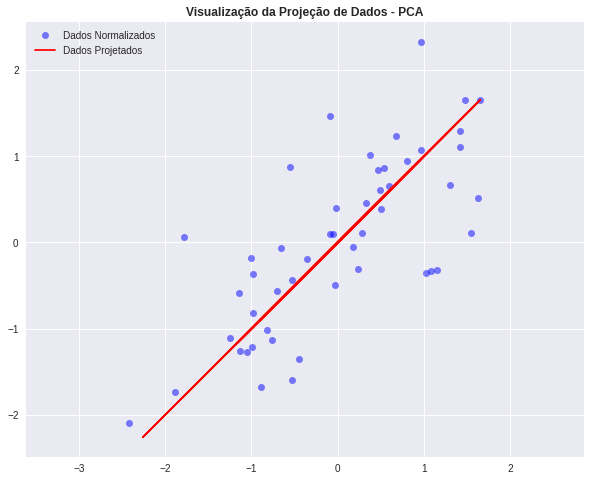

In [94]:

plt.figure(figsize=(10,8))

plt.plot(X_norm[:,0], X_norm[:,1], 'bo', alpha=0.5)
plt.plot(X_rec[:,0], X_rec[:,1], 'r-')

plt.title('Visualização da Projeção de Dados - PCA', fontweight='bold')
plt.legend(['Dados Normalizados', 'Dados Projetados'], loc=2)

plt.axis('equal')


#3 Agrupamento

##3.1 Implmentando K-means

O algoritmo Kmeans, ao ser executado deve: 
determinar os centróides, 
atribuir a cada objeto do grupo o centróide mais próximo, bem como atribuir um centróide a cada objeto e  recalculá-los. 
Para sua correta execução os passos acima devem se repetir até que os
centróides não se modifiquem.


In [97]:
filepath = 'https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml-t2/data/ex7data2.mat?raw=true'
r = requests.get(filepath, allow_redirects=True)
open('ex7data2.mat', 'wb').write(r.content)

data2 = scipy.io.loadmat('ex7data2.mat')



In [98]:
X2=data2["X"]

In [99]:
K = 3
 
X2[:5]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

Comandos para o plot do gráfico de dispersão de dados

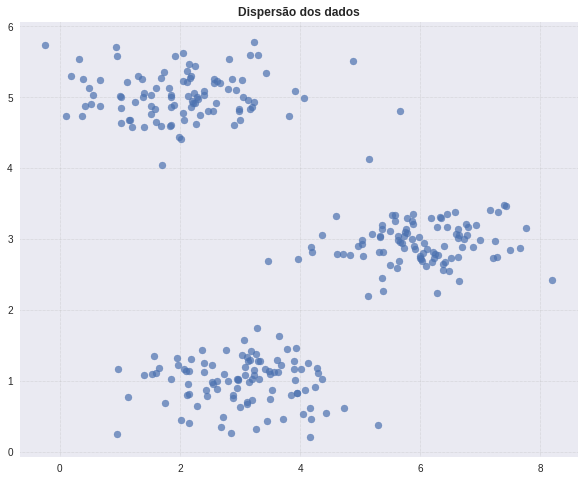

In [100]:

plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)


plt.scatter(X2[:, 0], X2[:, 1], marker='o', alpha=0.7)
plt.title('Dispersão dos dados', fontweight='bold')

sns.despine()



###3.1.1 Implementação simplificada com Scikit-Learn

Importando Kmeans da Scikit Learn

In [101]:
from sklearn.cluster import KMeans

Primeiramente, é necessário criar um objeto com o agrupador, para em seguida treinar o modelo com a função .fit

In [102]:

kmeans = KMeans(n_clusters=K)


kmeans.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Usando o modelo para predição dos grupos com a função .predict.

In [103]:


y_pred = kmeans.predict(X2)
y_pred

array([1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1], d

Identificação dos centroides de cada grupo

In [104]:

kmeans.cluster_centers_

array([[3.04367119, 1.01541041],
       [1.95399466, 5.02557006],
       [6.03366736, 3.00052511]])

A seguir, comandos para visualização do gráfico de agrupamento de KMeans. Os comandos serão separadamente explicados em comentáriosno código. 

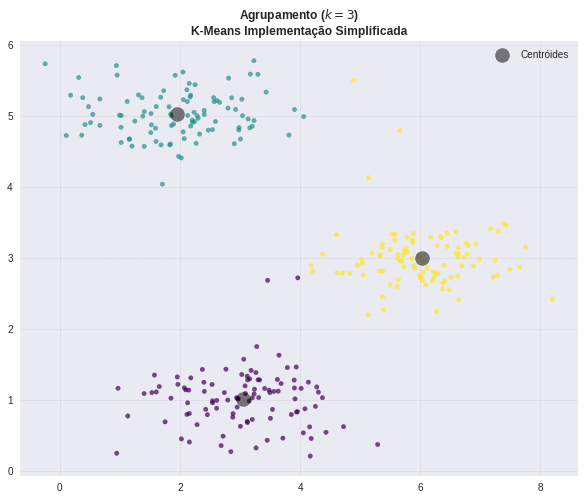

In [105]:

#Visualização do resultado do agrupamento
plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)

#Plotagem da dispersão com cores para diferenciar os grupos
#Os grupos previstos foram utilizados para definir a cor de cada um deles
plt.scatter(X2[:, 0], X2[:, 1], c=y_pred, s=20, cmap='viridis', alpha=0.7)


#Plotagem do centróide dos grupos individualmente
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,
            label='Centróides')

#Configurações do título
plt.title('Agrupamento ($k=3$)\nK-Means Implementação Simplificada',
          fontweight='bold')

plt.legend()
sns.despine()


##3.2 Encontrando centróides mais próximos

Utiliza-se a função para cálculo dos centróides

In [106]:

def find_closest_centroids(X, centroids):
  K = np.size(centroids, 0)
  idx = np.zeros((len(X), 1), dtype=np.int8)
  
  
  #Quantidade de exemplos no conjunto de dados
  m = np.size(X, 0)
 
  for i in range(m):
 
    for j in range(K):
      #Cálculo da distância Euclidiana entre o i-ésimo X e o j-ésimo centroide
      distance = np.linalg.norm(X[i] - centroids[j])
    
      #Se for a primeira iteração de j seta min_dist = distance
      if j == 0:
        min_dist = distance
 
      #Compara as distâncias de cada iteração,  atribuindo o valor a min_dist no caso do menor, 
      #gravando o índice do centroide
      if distance < min_dist:
        min_dist = distance
        idx[i] = j
  ##################################################
 
  return idx

Centróides iniciais seguido da conferência da função com os três primeiros exemplos, cujos valores esperados são: [0 2 1]

In [107]:

initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

find_closest_centroids(X2[:3], initial_centroids)

array([[0],
       [2],
       [1]], dtype=int8)

Chama-se a função initial_centroids

In [108]:

idx = find_closest_centroids(X2, initial_centroids)

Comandos para visualização do gráfico. Semelhantes aos do gráfico de centróides anterior.



Text(0.5, 1.0, 'Atribuições iniciais do agrupamento')

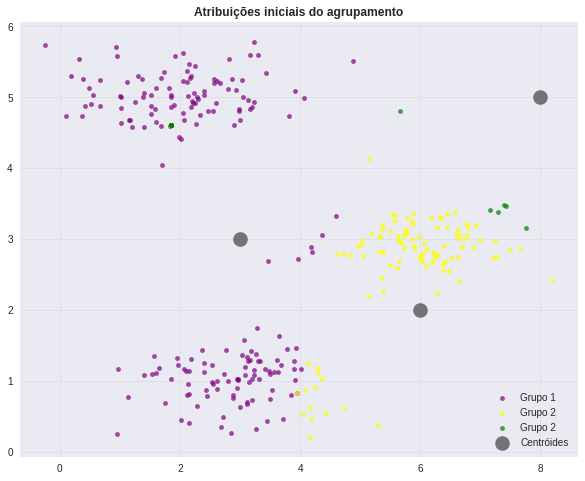

In [109]:

plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)


plt.scatter(X2[np.where(idx==0),0],X2[np.where(idx==0),1],
            color='purple', marker='o', alpha=0.7, s=20, label='Grupo 1')

plt.scatter(X2[np.where(idx==1),0],X2[np.where(idx==1),1],
            color='yellow', marker='o', alpha=0.7, s=20, label='Grupo 2')

plt.scatter(X2[np.where(idx==2),0],X2[np.where(idx==2),1],
            color='g', marker='o', alpha=0.7, s=20, label='Grupo 2')



centers = initial_centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5,
            label='Centróides')


plt.legend(loc=4)
sns.despine()
plt.title('Atribuições iniciais do agrupamento', fontweight='bold')


##3.3 Atualizações dos centróides

Utiliza-se a função abaixo a fim de computar centroides

In [110]:
def compute_centroids(X, idx, K):
  centroids = np.zeros((K,np.size(X,1)))

  #Calcula-se a os centroides conforme equação do item 3.3
  for i in range(K):
    #Identificam-se os exemplos do grupo
    grupo_indices = np.where(idx == i)[0]
    Ck = X2[grupo_indices,:]

    #Aplicação da equação
    centroids[i,:] = (1/len(Ck))*sum(Ck)
  ##################################################

  return centroids

Chama-se a função a fim de checar os centroides.

In [111]:

centroids = compute_centroids(X2, idx, K)
centroids

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

##3.4 k-Means aplicado ao conjunto de dados de exemplo

Utiliza-se a função run_kmeans aplizadas aos valores anteiormente computados)

In [112]:
def run_kmeans(X, initial_centroids, max_iters, plot_progress=False):
	K = np.size(initial_centroids, 0)
	centroids = initial_centroids 
	previous_centroids = centroids

	for iter in range(max_iters):
		#Atribuição de exemplos de centróides
		idx = find_closest_centroids(X, centroids)

		#Plote a evolução em centróides por meio da iteração
		if plot_progress:
			plt.scatter(X[np.where(idx==0),0],X[np.where(idx==0),1], marker='x')
			plt.scatter(X[np.where(idx==1),0],X[np.where(idx==1),1], marker='x')
			plt.scatter(X[np.where(idx==2),0],X[np.where(idx==2),1], marker='x')
			plt.plot(previous_centroids[:,0], previous_centroids[:,1], 'yo')
			plt.plot(centroids[:,0], centroids[:,1], 'bo')
			plt.show()

		previous_centroids = centroids

		#Calcular novos centróides
		centroids = compute_centroids(X, idx, K)

	return (centroids, idx)

In [113]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

max_iters = 10
centroids, idx = run_kmeans(X2, initial_centroids, max_iters, plot_progress=False)
print('Centroids após a primeira atualização:\n' + str(centroids))

Centroids após a primeira atualização:
[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]


Comandos de visualização de gráfico. Semenlhantes ao anterior.

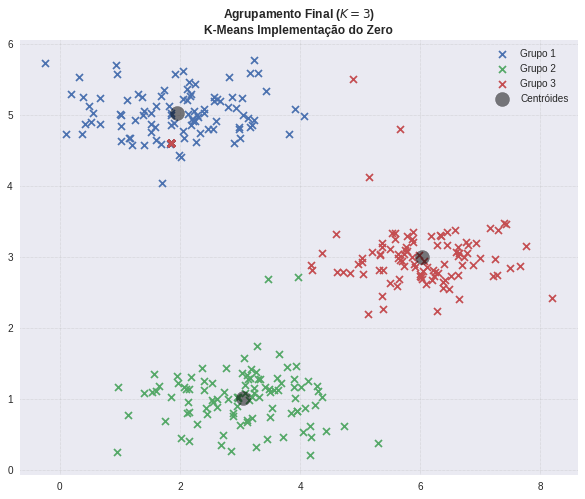

In [114]:

idx_new = find_closest_centroids(X2, centroids)
 

plt.figure(figsize=(10,8))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)
 
plt.scatter(X2[np.where(idx_new==0),0],X2[np.where(idx_new==0),1],
            marker='x', label='Grupo 1')
plt.scatter(X2[np.where(idx_new==1),0],X2[np.where(idx_new==1),1],
            marker='x', label='Grupo 2')
plt.scatter(X2[np.where(idx_new==2),0],X2[np.where(idx_new==2),1],
            marker='x', label='Grupo 3')


centers = centroids
plt.scatter(centers[:, 0], centers[:, 1],
            c='black', s=200, alpha=0.5, label='Centróides')
 
plt.title('Agrupamento Final ($K=3$)\nK-Means Implementação do Zero',
          fontweight='bold')

plt.legend()
sns.despine()
 


##3.5 Inicialização aleatória

Após várias repetições, conforme citado no início do exercício 3, é possível iniciar o kmeans aleatoriamente. Assim, os resultados de saída, ainda que sejam os mesmos, dificilmente seguirão a mesma ordem em cada experimento.

In [115]:
def kmeans_init_centroids(X, K):
	return X[np.random.choice(X.shape[0], K, replace=False)]

initial_centroids = kmeans_init_centroids(X, K)
print(initial_centroids)
print('='*40)



[[4.19169388 4.95469359]
 [5.33150572 4.68074235]
 [3.47580524 3.63284876]]


In [116]:
max_iters = 10
centroids, idx = run_kmeans(X2, initial_centroids, max_iters, plot_progress=False)
print('Centroids após a primeira atualização:\n' + str(centroids))

Centroids após a primeira atualização:
[[1.95399466 5.02557006]
 [6.03366736 3.00052511]
 [3.04367119 1.01541041]]


#4 Detecção de Anomalias

Carregamento do arquivo

In [117]:

import scipy.io as spio

In [118]:
filepath = 'https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ml-t2/data/ex8data1.mat?raw=true'
r = requests.get(filepath, allow_redirects=True)
open('ex8data2.mat', 'wb').write(r.content)

data3 = scipy.io.loadmat('ex8data2.mat')

Carga de treino e validação

In [119]:

X3 = np.array(data3['X'])

X3_val = np.array(data3['Xval'])
y3_val = data3['yval'].flatten()

Conferindo a dimensão do conjunto de dados

In [120]:

print(X3.shape, X3_val.shape, y3_val.shape)

(307, 2) (307, 2) (307,)


Comandos para o gráfico de dispersão

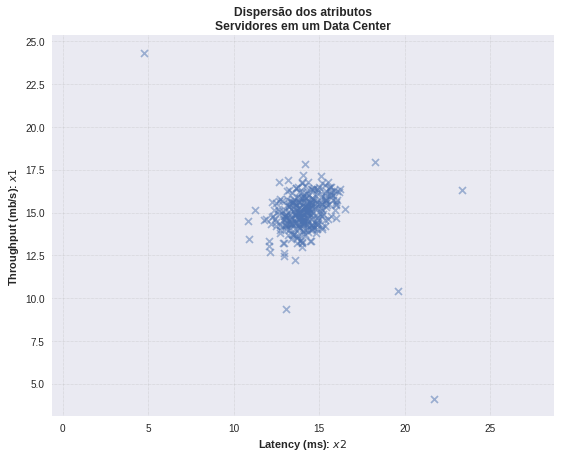

In [121]:
plt.figure(figsize=(9,7))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)


plt.scatter(X3[:,0], X3[:,1], marker='x', alpha=0.5)



plt.title('Dispersão dos atributos\nServidores em um Data Center',
          fontweight='bold')
plt.ylabel('Throughput (mb/s): $x1$', fontweight='bold')
plt.xlabel('Latency (ms): $x2$', fontweight='bold')
plt.axis('equal')
sns.despine()

##4.1 Distribuição Gaussiana


Comandos para visualização do gráfico de distribuição gaussiana

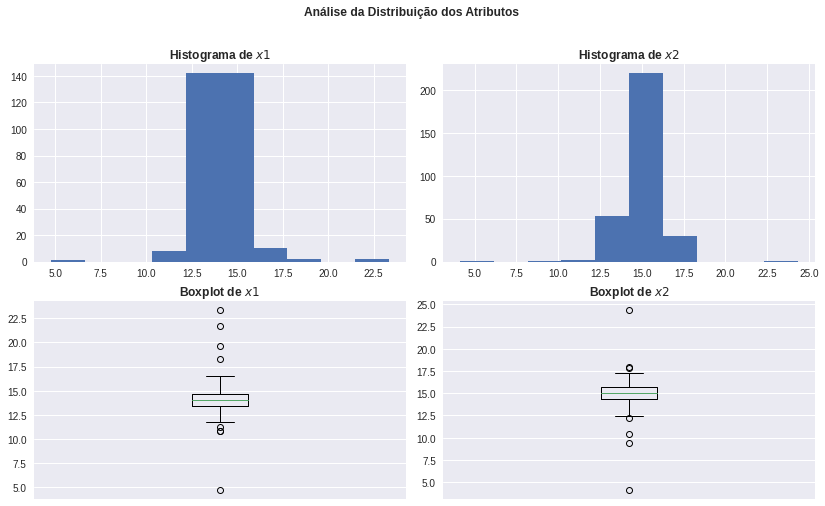

In [122]:
fig = plt.figure(figsize=(14,8))
fig.suptitle('Análise da Distribuição dos Atributos', fontweight='bold')

#Criação dos subplots
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


#Histogramas
ax1.hist(X3[:,0])
ax1.set_title('Histograma de $x1$', fontweight='bold')

ax2.hist(X3[:,1])
ax2.set_title('Histograma de $x2$', fontweight='bold')


#Boxplots
ax3.boxplot(X3[:,0])
ax3.set_title('Boxplot de $x1$', fontweight='bold')

ax4.boxplot(X3[:,1])
ax4.set_title('Boxplot de $x2$', fontweight='bold')


#Configurações visuais adicionais
ax3.set_xticks([])
ax4.set_xticks([])
plt.subplots_adjust(wspace=0.1)

##4.2 Estimativa de parâmetros para uma gaussiana

Utiliza-se a função de estimativa de parâmetros gaussianos. 

In [123]:

def estimate_gaussian_params(X):
  """
  Essa funcao deve computar e retornar mu e sigma2,
  vetores que contem a media e a variancia de cada
  caracteristica (feature) de X.
  """
  ########################
  # SEU CODIGO AQUI :
  ########################
  mu = np.mean(X, axis=0)
  sigma2 = np.var(X, axis=0)

  return (mu, sigma2)

In [124]:
mu, sigma2 = estimate_gaussian_params(X3)
print(f'mu:     {mu}\nsigma2: {sigma2}')

mu:     [14.11222578 14.99771051]
sigma2: [1.83263141 1.70974533]


In [125]:

# Source: https://github.com/Grzego/handwriting-generation/issues/16 
def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

Comandos para visualização do gráfico

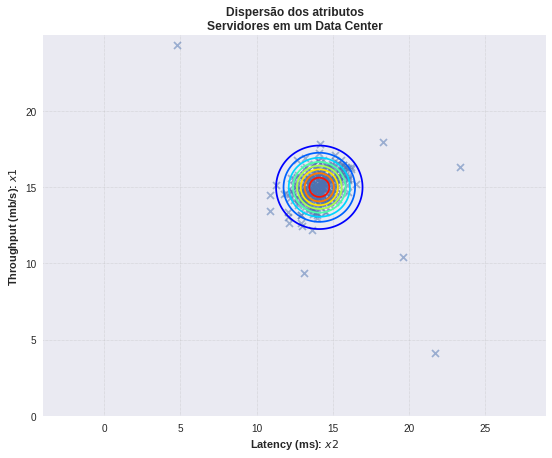

In [126]:
#Dados adicionais para construção dos contornos
x = np.arange(0, 25, .025)
y = np.arange(0, 25, .025)
first_axis, second_axis = np.meshgrid(x, y)

Z = bivariate_normal(first_axis, second_axis,
                     np.sqrt(sigma2[0]), np.sqrt(sigma2[1]),
                     mu[0], mu[1])

plt.figure(figsize=(9,7))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)


plt.scatter(X3[:,0], X3[:,1], marker='x', alpha=0.5)

#Contornos da Gaussiana
plt.contour(first_axis, second_axis, Z, 10, cmap=plt.cm.jet)


plt.title('Dispersão dos atributos\nServidores em um Data Center',
          fontweight='bold')
plt.ylabel('Throughput (mb/s): $x1$', fontweight='bold')
plt.xlabel('Latency (ms): $x2$', fontweight='bold')
plt.axis('equal')
sns.despine()


Incluindo dados adicionais

In [136]:

from scipy import stats

Primeiramente, calcula-se o desvio padrão e posteriormente a probabilidade com o conjunto de validação. Ao final, verifica-se as dimensões dos dados gerados.

In [137]:


#desvio padrão 
stddev = np.sqrt(sigma2)

#Probabilidade
pval = np.zeros((X3_val.shape[0], X3_val.shape[1]))  
pval[:,0] = stats.norm.pdf(X3_val[:,0], mu[0], stddev[0])  
pval[:,1] = stats.norm.pdf(X3_val[:,1], mu[1], stddev[1])


print(np.prod(pval, axis=1).shape)

(307,)


Exemplificando as cinco primeiras linhas de pval

In [138]:

pval[:5]

array([[0.13668804, 0.30457725],
       [0.27727265, 0.29540963],
       [0.25238744, 0.16132253],
       [0.27314666, 0.22661829],
       [0.26277866, 0.27090007]])

Subconjunto com os primeiros 10 exemplos

In [139]:

y3_real = np.array(y3_val[:10])
y3_real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=uint8)

Predições fictícias para teste da função f1_score_

In [140]:

y3_pred = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1])
y3_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

A função abaixo, assim como outras, foi retirada do material de aula. Mais explicações no comentários do código.

In [141]:
def f1_score_(y_real, y_pred, matriz=False):
  """
  Função implementa o cálculo manual da métrica F1 Score

  Função funciona para fins didáticos, mas não implementa
  a forma mais eficiente de cálculo. Para isso, há implementações
  prontas como na biblioteca Scikit-Learn classe metrics.f1_score
  """
  ##==============================================
  #Cálculos dos elementos da matriz de confusão
  ##==============================================
  #Inicialização de valores
  tp = 0
  fp = 0
  tn = 0
  fn = 0
  m = np.size(y_pred)

  for k in range(0, len(y_pred)):
    #Checagem da previsão da classe positiva
    if int(y_pred[k]) == 1:
      if int(y_pred[k]) == y_real[k]:
        tp += 1
      else:
        fp += 1

    #Checagem da previsão da classe negativa
    elif int(y_pred[k]) == 0:
      if int(y_pred[k]) == y_real[k]:
        tn += 1
      else:
        fn += 1

  ##========================================
  #Cálculos das métricas precision e recall
  ##========================================
  try:
    prec = (tp) / (tp + fp)
  except ZeroDivisionError:
        prec = 0
  try:
    rec = (tp) / (tp + fn)
  except ZeroDivisionError:
        rec = 0

  ##========================================
  #Cálculo do F1
  ##========================================
  try:
    f1 = (2 * prec * rec)/(prec + rec)
  except ZeroDivisionError:
    f1 = 0

  if matriz == True:
    print(f'TP: {tp} FP: {fp}')
    print(f'TN: {tn} FN: {fn}')
    matriz = {'TP': tp, 'FP': fp,
              'TN': tn, 'FN': fn}

    return f1, matriz

  return f1

Executa-se o teste da função após aplicada

In [142]:

f1, matriz = f1_score_(y3_real, y3_pred, True)
print('-'*50)
print(f1, matriz)

TP: 1 FP: 1
TN: 8 FN: 0
--------------------------------------------------
0.6666666666666666 {'TP': 1, 'FP': 1, 'TN': 8, 'FN': 0}


Personalização da função select_epsilon 

In [143]:


"""
A implementação poderia ser simplificada pelo uso do f1_score ativando
a linha de código ativada abaixo e substituindo a chamada da função f1_score_
pela classe abaixo, conforme linha comentada no loop interno

#from sklearn.metrics import f1_score
"""

def select_epsilon(pval, y_val):
  best_epsilon_value = 0
  best_f1_value = 0

  step_size = (pval.max() - pval.min()) / 1000

  print('step size: ' + str(step_size))

  for epsilon in np.arange(pval.min(), pval.max(), step_size):
      preds = pval < epsilon
      #Substituir a linha abaixo para uso com Scikit-Learn
      #f = f1_score(y_val, preds)

      #Uso da função personalizada para o f1 score
      f = f1_score_(y_val, preds)

      if f > best_f1_value:
        best_f1_value = f
        best_epsilon_value = epsilon

  ########################
  # SEU CODIGO AQUI :
  # Dentro deste loop, voce deve implementar logica para
  # definir corretamente os valores das variaveis
  # best_epsilon_value e best_f1_value.
  ########################
  return best_epsilon_value, best_f1_value

In [144]:
epsilon, _ = select_epsilon(np.prod(pval, axis=1), y3_val)
print('Melhor valor encontrado para epsilon: ' + str(epsilon))

step size: 8.990852779269493e-05
Melhor valor encontrado para epsilon: 8.990852779269493e-05


Comandos para visualização do gráfico de detecção de anomalias

<Figure size 576x396 with 0 Axes>

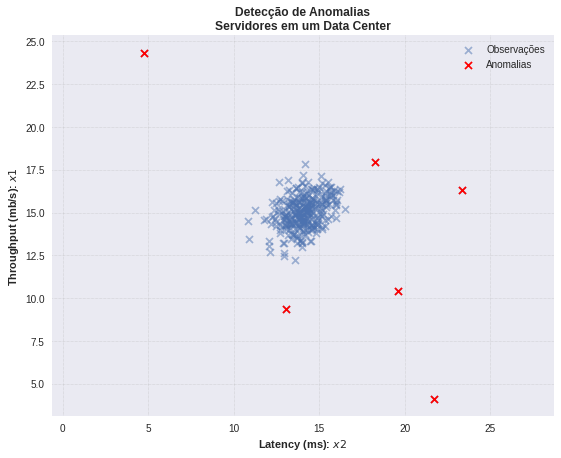

In [145]:
#Dados para detecção das anomalias
p = np.zeros((X3.shape[0], X3.shape[1]))  
p[:,0] = stats.norm.pdf(X3[:,0], mu[0], stddev[0])  
p[:,1] = stats.norm.pdf(X3[:,1], mu[1], stddev[1])

#Aplicação do modelo para detecção de anomalias no eixo X
anomalies = np.where(np.prod(p, axis=1) < epsilon)

plt.clf()
plt.figure(figsize=(9,7))
plt.grid(color='0.7', linestyle=':', linewidth=0.5)


plt.scatter(X3[:,0], X3[:,1], marker='x', alpha=0.5, label='Observações')

#Detecção de anomalias
plt.scatter(X3[anomalies[0],0], X3[anomalies[0],1], s=50,
            color='r', marker='x', label='Anomalias') 


plt.title('Detecção de Anomalias\nServidores em um Data Center',
          fontweight='bold')
plt.ylabel('Throughput (mb/s): $x1$', fontweight='bold')
plt.xlabel('Latency (ms): $x2$', fontweight='bold')
plt.axis('equal')
plt.legend(loc='best')
sns.despine()


https://github.com/scikit-learn/scikit-learn/blob/15a949460/sklearn/neighbors/_base.py#L596

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://medium.com/@corymaklin/machine-learning-algorithms-part-11-ridge-regression-7d5861c2bc76

https://qastack.com.br/datascience/5656/k-means-what-are-some-good-ways-to-choose-an-efficient-set-of-initial-centroids

https://www.inf.ufpr.br/lesoliveira/padroes/segmentacao.pdf

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html